<a href="https://colab.research.google.com/github/Adlinnithisha/GoldPrice-ml-project/blob/main/GOLD_PRICE_ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

IMPORTING LIBRARIES


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge , Lasso , ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from tabulate import tabulate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

WEB SCRAPING DATA FROM YFINANCE

In [ ]:
def fetch_yfinance_data(ticker, start_date, end_date):
  df = yf.download(ticker, start=start_date, end=end_date)
  return df

In [ ]:
if __name__ == "__main__":
  gold_price='GC=F'
  start_date='2010-01-01'
  end_date='2024-01-26'

In [ ]:
 gold_price = fetch_yfinance_data(gold_price, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df=gold_price
print(df)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04  1117.699951  1122.300049  1097.099976  1117.699951  1117.699951   
2010-01-05  1118.099976  1126.500000  1115.000000  1118.099976  1118.099976   
2010-01-06  1135.900024  1139.199951  1120.699951  1135.900024  1135.900024   
2010-01-07  1133.099976  1133.099976  1129.199951  1133.099976  1133.099976   
2010-01-08  1138.199951  1138.199951  1122.699951  1138.199951  1138.199951   
...                 ...          ...          ...          ...          ...   
2024-01-19  2023.199951  2036.000000  2019.500000  2026.500000  2026.500000   
2024-01-22  2021.300049  2021.300049  2019.800049  2019.800049  2019.800049   
2024-01-23  2030.300049  2030.300049  2022.500000  2023.699951  2023.699951   
2024-01-24  2023.199951  2033.199951  2013.900024  2013.900024  2013.900024   
2024-01-25  2012.099976  2022.400024  2012.099976  2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3537 entries, 2010-01-04 to 2024-01-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3537 non-null   float64
 1   High       3537 non-null   float64
 2   Low        3537 non-null   float64
 3   Close      3537 non-null   float64
 4   Adj Close  3537 non-null   float64
 5   Volume     3537 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 193.4 KB


EXPLORATORY DATA ANALYSIS

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000
mean,1487.358637,1494.712950,1479.559712,1487.215210,1487.215210,5379.645180
std,273.939261,275.571361,272.415245,273.894499,273.894499,29017.917535
min,1052.199951,1062.000000,1045.199951,1050.800049,1050.800049,0.000000
25%,1253.400024,1258.300049,1247.699951,1253.000000,1253.000000,45.000000
50%,1384.099976,1391.300049,1373.699951,1384.300049,1384.300049,157.000000
75%,1742.000000,1751.099976,1732.000000,1742.199951,1742.199951,503.000000
max,2081.600098,2130.199951,2066.500000,2081.899902,2081.899902,386334.000000


In [ ]:
corrmatrix=df.corr()
corrmatrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999435,0.999224,0.998824,0.998824,-0.024137
High,0.999435,1.000000,0.998956,0.999350,0.999350,-0.026621
Low,0.999224,0.998956,1.000000,0.999501,0.999501,-0.022059
Close,0.998824,0.999350,0.999501,1.000000,1.000000,-0.024752
Adj Close,0.998824,0.999350,0.999501,1.000000,1.000000,-0.024752
Volume,-0.024137,-0.026621,-0.022059,-0.024752,-0.024752,1.000000


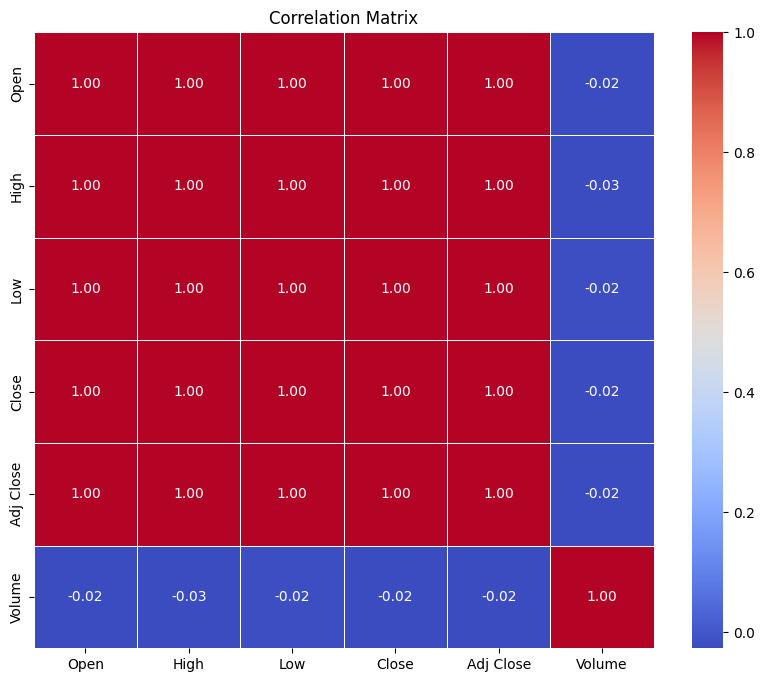

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corrmatrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

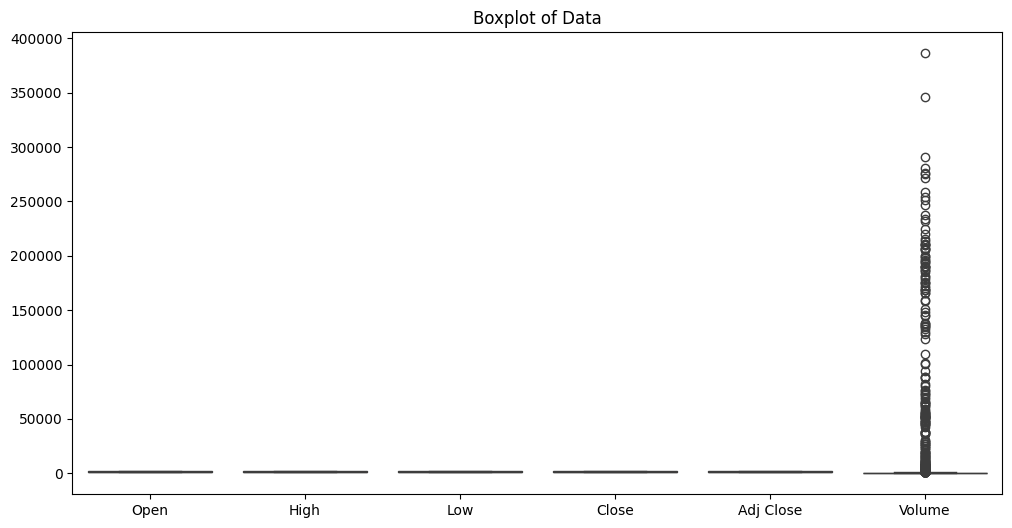

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Data')
plt.show()

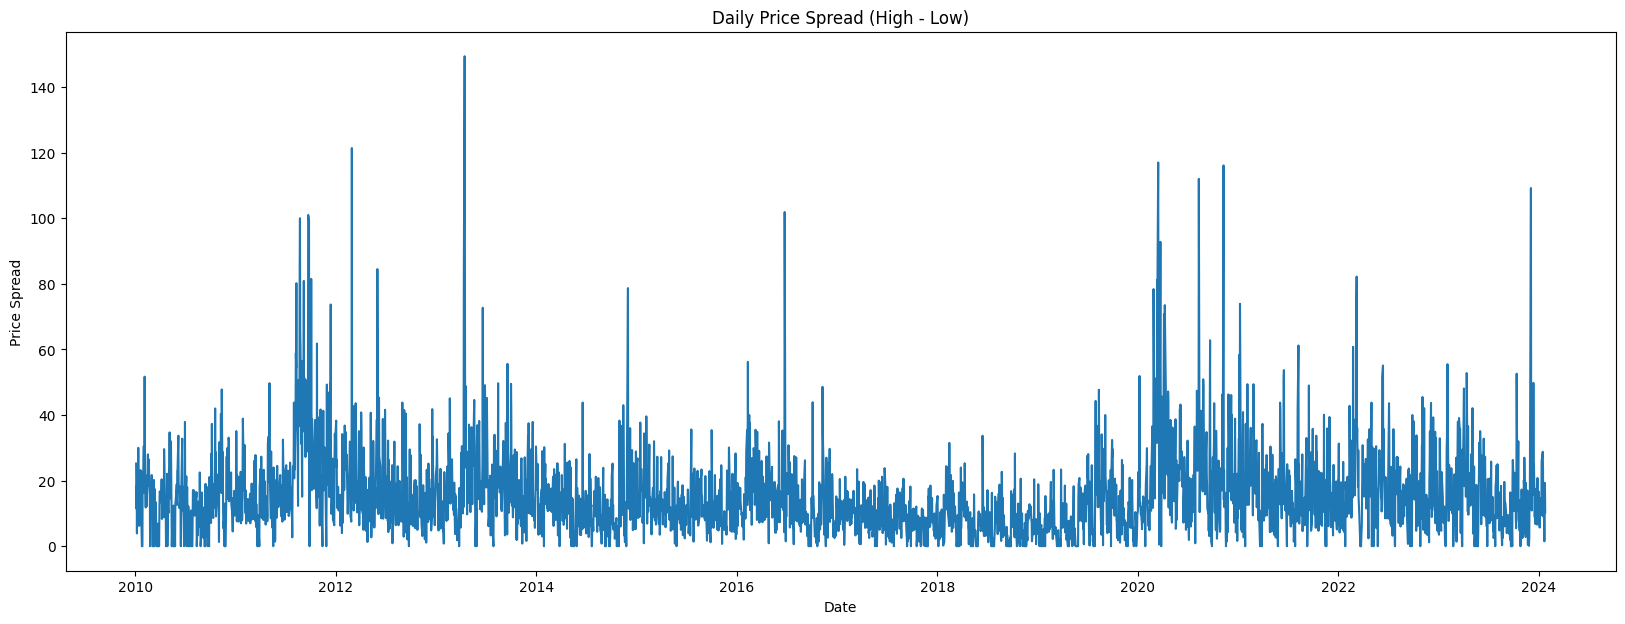

In [ ]:
df['Price_Spread'] = df['High'] - df['Low']
plt.figure(figsize=(20,7))
sns.lineplot(x=df.index, y=df['Price_Spread'])
plt.title('Daily Price Spread (High - Low)')
plt.xlabel('Date')
plt.ylabel('Price Spread')
plt.show()

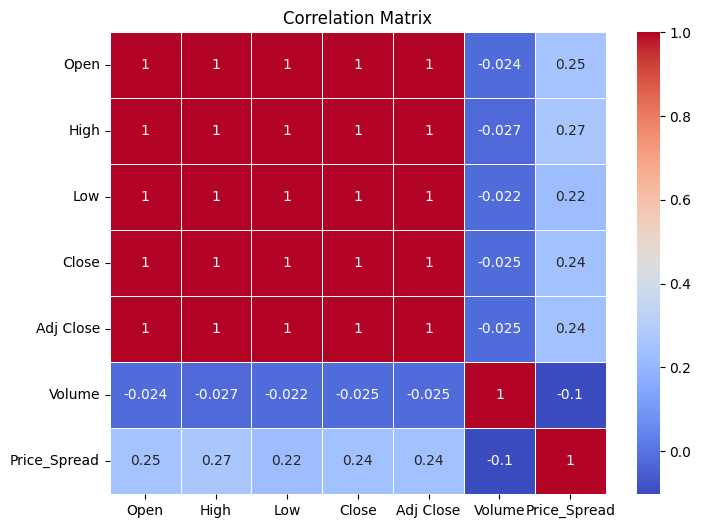

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='Date'>

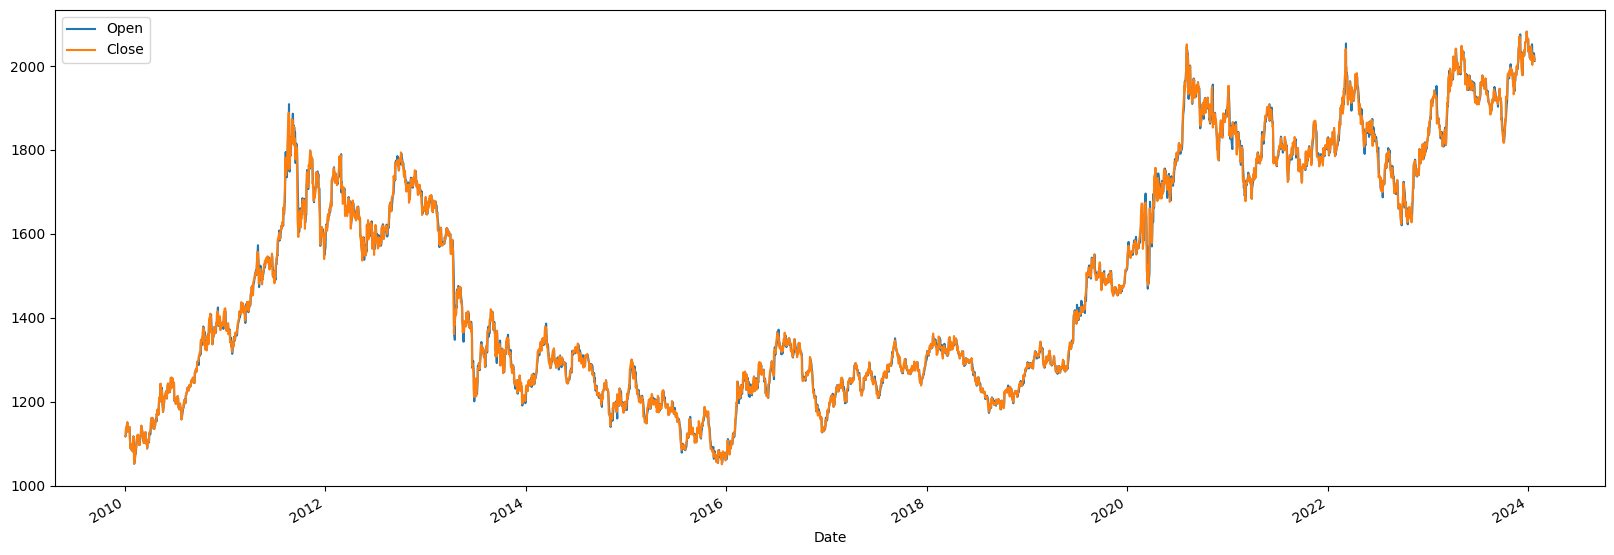

In [ ]:
df[['Open','Close']].plot(figsize=(20,7))

<Axes: xlabel='Date'>

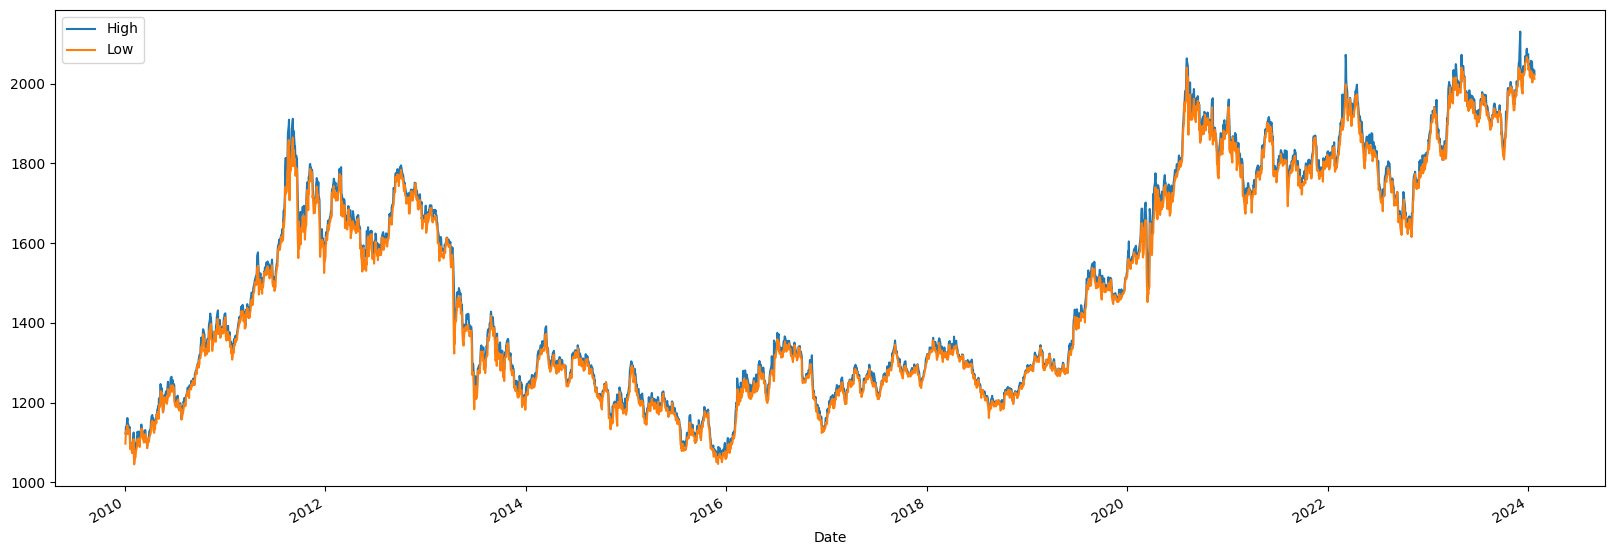

In [ ]:
df[['High','Low']].plot(figsize=(20,7))

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Price_Spread
Date,,,,,,,
2010-01-04,1117.699951,1122.300049,1097.099976,1117.699951,1117.699951,184,25.200073
2010-01-05,1118.099976,1126.500000,1115.000000,1118.099976,1118.099976,53,11.500000
2010-01-06,1135.900024,1139.199951,1120.699951,1135.900024,1135.900024,363,18.500000
2010-01-07,1133.099976,1133.099976,1129.199951,1133.099976,1133.099976,56,3.900024
2010-01-08,1138.199951,1138.199951,1122.699951,1138.199951,1138.199951,54,15.500000


SPLITTING DATA

In [ ]:
x=df.drop(columns=['Close'])
y=df.Close

AUTO SPLIT FOR GOLD DATASET

In [ ]:

classifiers = {
    'RandomForest':RandomForestRegressor(),'DecisionTree':DecisionTreeRegressor(),
    'linear':LinearRegression(),'SVM':SVR(),'KNN':KNeighborsRegressor(),
    'Gradient_boost':GradientBoostingRegressor()
    }

In [ ]:
def performance(xtrain,xtest,ytrain,ytest,classifier):
  classifier.fit(xtrain,ytrain)
  ypred=classifier.predict(xtest)
  r2 = r2_score(ytest,ypred)
  MAE = mean_absolute_error(ytest,ypred)
  MSE = mean_squared_error(ytest,ypred)
  RMSE= np.sqrt(mean_squared_error(ytest,ypred))
  return r2,MAE,MSE,RMSE

In [ ]:
def find_optimal_split_ratio(x, y, classifiers, splitting_ratios):
  optimal_ratio=None
  best_cls=None
  max_r2 = 0.0
  header=["Test Ratio", "Classifier", "r2_score","MAE","MSE","RMSE"]
  table_data = []
  for test_ratio in splitting_ratios:
     xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=test_ratio,random_state=0)
     for classifier_name, classifier in classifiers.items():
            r2_score, MAE, MSE, RMSE = performance(xtrain, xtest, ytrain, ytest, classifier)
            row_data = [f"{test_ratio: .2f}",classifier_name,f"{r2_score: .4f}",f"{MAE: .4f}",f"{MSE: .4f}",f"{RMSE: .4f}"]
            table_data.append(row_data)
            if r2_score > max_r2:
              max_r2 = r2_score
              optimal_ratio = test_ratio
  print(f"Optimal Splitting Ratio: {optimal_ratio:.2f}")
  print("best model:", best_cls)
  print(tabulate(table_data, headers=header, tablefmt="grid"))

In [ ]:
splitting_ratios = np.linspace(0.1,0.9)
find_optimal_split_ratio(x, y, classifiers, splitting_ratios)

Optimal Splitting Ratio: 0.10
best model: None
+--------------+----------------+------------+----------+------------+----------+
|   Test Ratio | Classifier     |   r2_score |      MAE |        MSE |     RMSE |
+==============+================+============+==========+============+==========+
|         0.1  | RandomForest   |     1      |   0.2245 |     0.1543 |   0.3928 |
+--------------+----------------+------------+----------+------------+----------+
|         0.1  | DecisionTree   |     1      |   0.3633 |     0.5093 |   0.7137 |
+--------------+----------------+------------+----------+------------+----------+
|         0.1  | linear         |     1      |   0      |     0      |   0      |
+--------------+----------------+------------+----------+------------+----------+
|         0.1  | SVM            |    -0.1659 | 245.293  | 88769.7    | 297.942  |
+--------------+----------------+------------+----------+------------+----------+
|         0.1  | KNN            |     0.9601 |  16.

SPLITING THE DATA BY USING AUTOSPLIT

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.10 , random_state=42)

In [ ]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(3183, 6) (354, 6) (3183,) (354,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

LINEAR REGRESSION

In [ ]:
linear = LinearRegression()
linear.fit(x_train_scaled , y_train)
y_pred = linear.predict(x_test_scaled)

In [ ]:
print(r2_score(y_test , y_pred))
print(mean_squared_error(y_test , y_pred))
print(mean_absolute_error(y_test , y_pred))

1.0
4.0891696948242896e-26
1.5415164436829291e-13


RIDGE REGRESSION

In [ ]:
rid = Ridge(alpha= 1)
rid.fit(x_train_scaled , y_train)
y_pred = rid.predict(x_test_scaled)

In [ ]:
print(r2_score(y_test , y_pred))
print(mean_squared_error(y_test , y_pred))
print(mean_absolute_error(y_test , y_pred))

0.9999533210960164
3.4830298245367044
1.3105229947589296


LASSO REGRESSION

In [ ]:
las = Lasso(alpha= 1)
las.fit(x_train_scaled , y_train)
y_pred = las.predict(x_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.464e+04, tolerance: 2.388e+04
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print(r2_score(y_test , y_pred))
print(mean_squared_error(y_test , y_pred))
print(mean_absolute_error(y_test , y_pred))

0.9998107470443698
14.121447433176735
2.6496636596275924


ELASTIC NET

In [ ]:
el = ElasticNet(alpha= 1 , l1_ratio=0.5)
el.fit(x_train_scaled , y_train)
y_pred = el.predict(x_test_scaled)

In [ ]:
print(r2_score(y_test , y_pred))
print(mean_squared_error(y_test , y_pred))
print(mean_absolute_error(y_test , y_pred))

0.9866031839809458
999.627364101309
27.76635126503703


RANDOM FOREST REGRESSOR

In [ ]:
random=RandomForestRegressor()
random.fit(x_train_scaled,y_train)
y_pred=random.predict(x_test_scaled)

In [ ]:
print(r2_score(y_test , y_pred))
print(mean_squared_error(y_test , y_pred))
print(mean_absolute_error(y_test , y_pred))

0.9999985167462043
0.11067563217843696
0.21353475969390287


DECISION TREE REGRESSOR

In [ ]:
decision=DecisionTreeRegressor()
decision.fit(x_train_scaled,y_train)
y_pred=decision.predict(x_test_scaled)
print(r2_score(y_test , y_pred))
print(mean_squared_error(y_test , y_pred))
print(mean_absolute_error(y_test , y_pred))


0.9999951246586471
0.3637823060912601
0.3502797272245763


SUPPORT VECTOR REGRESSOR

In [ ]:
svm=SVR()
svm.fit(x_train_scaled,y_train)
y_pred=svm.predict(x_test_scaled)
print(r2_score(y_test , y_pred))
print(mean_squared_error(y_test , y_pred))
print(mean_absolute_error(y_test , y_pred))

0.9242335962792652
5653.445589688754
37.31767541546158


K NEIGHBOURBORS REGRESSOR

In [ ]:
knn=KNeighborsRegressor()
knn.fit(x_train_scaled,y_train)
y_pred=knn.predict(x_test_scaled)
print(r2_score(y_test , y_pred))
print(mean_squared_error(y_test , y_pred))
print(mean_absolute_error(y_test , y_pred))

0.9966327711629422
251.2517960929298
7.444125452418785


GRADIENT BOOSTING REGRESSOR

In [ ]:
gradient=GradientBoostingRegressor()
gradient.fit(x_train_scaled,y_train)
y_pred=gradient.predict(x_test_scaled)
print(r2_score(y_test , y_pred))
print(mean_squared_error(y_test , y_pred))
print(mean_absolute_error(y_test , y_pred))

0.9999535616347405
3.4650815978632514
1.4189932450725056


In [ ]:
models = ['Linear Regression','Ridge Regression','Lasso Regression','Elastic net','Random forest Regressor', 'Decision Tree Regressor', 'Gradient Boosting Regressor','Support vector machine']
R2_score = [1.0,0.99,0.99,0.98,0.99,0.99,0.99,0.92]

table_data = list(zip(models, R2_score))  #zip is used as function to combine the models and accuracy

headers = ['Model', 'R2_score']

table = tabulate(table_data, headers=headers, tablefmt='grid')

print(table)

+-----------------------------+------------+
| Model                       |   R2_score |
+=============================+============+
| Linear Regression           |       1    |
+-----------------------------+------------+
| Ridge Regression            |       0.99 |
+-----------------------------+------------+
| Lasso Regression            |       0.99 |
+-----------------------------+------------+
| Elastic net                 |       0.98 |
+-----------------------------+------------+
| Random forest Regressor     |       0.99 |
+-----------------------------+------------+
| Decision Tree Regressor     |       0.99 |
+-----------------------------+------------+
| Gradient Boosting Regressor |       0.99 |
+-----------------------------+------------+
| Support vector machine      |       0.92 |
+-----------------------------+------------+
